# Tarea2: Clasificación y Regresión

- José Pinto 202073559-K
- Vicente Ruiz 202073595-9

##Clasificación
Todos los datos provienen de una medición continua de EEG con el Emotiv EEG Neuroheadset. La duración de la medición fue de 117 segundos. El estado del ojo fue detectado a través de una cámara durante la medición de EEG y luego agregado manualmente al archivo después de analizar los fotogramas del video. '1' indica el estado de ojos cerrados y '0' el estado de ojos abiertos. Todos los valores están en orden cronológico con el primer valor medido en la parte superior de los datos.

Las características corresponden a 14 mediciones de EEG del auricular, originalmente etiquetadas como AF3, F7, F3, FC5, T7, P, O1, O2, P8, T8, FC6, F4, F8, AF4, en ese orden.

- 0 -> OJO ABIERTO
- 1 -> OJO CERRADO

## Regresión

El Conjunto de Datos de Desempeño Estudiantil es un conjunto de datos diseñado para examinar los factores que influyen en el desempeño académico de los estudiantes. El conjunto de datos consta de 10,000 registros estudiantiles, donde cada registro contiene información sobre varios predictores y un índice de desempeño.

### Variables:
- Hours Studied: El número total de horas dedicadas al estudio por cada estudiante.
- Previous Scores: Los puntajes obtenidos por los estudiantes en exámenes previos.

- Extracurricular Activities: Si el estudiante participa en actividades extracurriculares (Sí o No).

- Sleep Hours: El número promedio de horas de sueño que el estudiante tuvo por día.

- Sample Question Papers Practiced: El número de preguntas de muestra que el estudiante practicó.


### Variable Objetivo

Performance Index: Una medida del desempeño general de cada estudiante. El índice de desempeño representa el desempeño académico del estudiante y ha sido redondeado al entero más cercano. El índice varía de 10 a 100, siendo valores más altos indicativos de un mejor desempeño.

# Clasificación:
Para efectos de esta Tarea, usar el dataset EEG_eyes_classification.csv , del cual no se investigará a que corresponde cada variable por lo que están renombradas, además note que la columna 'Class' se encuentra mal etiquetada, el valor b'1' corresponde al 0 y el valor b'2' corresponde a 1. Cualquier otro valor atípico que encuentre, manéjelo como encuentre necesario.

- Cargar Datos y realizar limpieza de estos: manejar valores nulos, identificar el tipo de cada uno de las columnas y corregir lo que se encuentre mal en caso de ser necesario. HINT: Calcular el porcentaje de valores por columna puede ser de gran ayuda para tomar decisiones, no tenga miedo a eliminar lo que no sirve, en cuanto mantenga la integridad del dataset.

- Balanceo de datos: Se debe dejar ambas clases con el mismo numero de ocurrencias de cada una de las clases en el dataset. HINT: la creación de nuevos datos a partir de métricas o probabilidades puede ser peligrosa si no se conoce el origen de los datos.

- Estandarización de datos: Realizar la estandarización de datos correspondiente para que los datos tengan la misma escala

- Separación de datos: Realizar la separación del dataset en 3 partes: 60% Train, 20% Test y 20% Validation, manteniendo la proporción de clases en cada uno de estas separaciones. HINT: Ciertas bibliotecas tienen parámetros para dejar la separación balanceada y además puede elegir en que proporción dejara separa el dataset.

- Entrenamiento: Se deben entrenar 3 modelos de clasificación, Random Forest, Desicion Tree y regresión logística, en primer lugar con los hiperparámetros default y luego realizando una optimización de hiperparámetros, ya se a mano o con alguna biblioteca. En cada entrenamiento utilizar metricas correspondientes para Hint: Si quiere ocupar una biblioteca se recomienda utilizar RandomizedSearchCV, GridSearchCV u Optuna siendo esta ultima la mas completa, pero también mas compleja (Puntos extra https://optuna.org/).

Elija un modelo y explique por qué encuentra que es el mejor de los tres en base a los resultados obtenidos. Además muestre cuales fueron las características (variables) mas importantes según dicho modelo, al momento de hacer su predicción.

Realice un grafico de los datos predichos por su modelo óptimo vs datos reales

## 0. Imports

In [ ]:
!pip install optuna

In [ ]:
import pandas as pd
import plotly.express as px

# Estandarizar
from sklearn.preprocessing import StandardScaler

# Separar
from sklearn.model_selection import train_test_split

# Entrenamiento
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

# Mejora
import optuna
import logging

from sklearn.model_selection import cross_val_score

## 1. Carga y limpieza de Datos

In [ ]:
# Cargamos el archivo csv
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRLNasi8qPQD1bYUwgB1BAzRd3TQlqZvizjzgAtRzmQU9QjgCX2LeBmJjUOv9PaL06fCan9tF6512rQ/pub?gid=1536373086&single=true&output=csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,Class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,NaN,b'1'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,NaN,b'1'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,NaN,b'1'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,NaN,b'1'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,NaN,b'1'


In [ ]:
# Obtenemos la cantidad de (filas, columnas)
df.shape

(14980, 16)

In [ ]:
# Vemos los valores nulos y el tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      14580 non-null  float64
 1   V2      14980 non-null  float64
 2   V3      14980 non-null  float64
 3   V4      14580 non-null  float64
 4   V5      14580 non-null  float64
 5   V6      14580 non-null  float64
 6   V7      14980 non-null  float64
 7   V8      14580 non-null  float64
 8   V9      14580 non-null  float64
 9   V10     14980 non-null  float64
 10  V11     14580 non-null  float64
 11  V12     14930 non-null  float64
 12  V13     14980 non-null  float64
 13  V14     14930 non-null  float64
 14  V15     900 non-null    object 
 15  Class   14980 non-null  object 
dtypes: float64(14), object(2)
memory usage: 1.8+ MB


In [ ]:
#Porcentaje de valores en columna V15
print(df['V15'].value_counts(normalize=True) * 100)

V15
41.061.553.140.216.800    0.111111
4.116.314.535.422.720     0.111111
41.058.167.320.160.800    0.111111
4.109.654.355.483.570     0.111111
4.106.269.697.109.700     0.111111
                            ...   
4.110.761.069.202.030     0.111111
4.099.266.614.572.940     0.111111
4.106.044.718.085.880     0.111111
4.104.982.154.270.410     0.111111
411.522.368.723.346       0.111111
Name: proportion, Length: 900, dtype: float64


In [ ]:
# Eliminamos valores nulos desde la columnas V1 hasta la V14
df = df.dropna(subset=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14'])

# Eliminamos la columna V15
df = df.drop('V15', axis=1)

# Corregir la etiqueta de la columna 'Class'
df['Class'] = df['Class'].replace({"b'1'": 0, "b'2'": 1, 'Open':0, 'Closed':1})

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14481 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      14481 non-null  float64
 1   V2      14481 non-null  float64
 2   V3      14481 non-null  float64
 3   V4      14481 non-null  float64
 4   V5      14481 non-null  float64
 5   V6      14481 non-null  float64
 6   V7      14481 non-null  float64
 7   V8      14481 non-null  float64
 8   V9      14481 non-null  float64
 9   V10     14481 non-null  float64
 10  V11     14481 non-null  float64
 11  V12     14481 non-null  float64
 12  V13     14481 non-null  float64
 13  V14     14481 non-null  float64
 14  Class   14481 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.8 MB


## 2. Balanceo de Datos

In [ ]:
# Contamos el número de ocurrencias de cada clase
clase_ocurrencias = df['Class'].value_counts()

df['Class'].value_counts()

Class
0    7989
1    6492
Name: count, dtype: int64

In [ ]:
# Encontramos la clase minoritaria y la mayoritaria
clase_minoritaria = clase_ocurrencias.idxmin()
clase_mayoritaria = clase_ocurrencias.idxmax()

# Seleccionamos muestras de la clase mayoritaria para igualar el número de muestras de la clase minoritaria
df_clase_minoritaria = df[df['Class'] == clase_minoritaria]
df_clase_mayoritaria = df[df['Class'] == clase_mayoritaria].sample(n=clase_ocurrencias.min(), random_state=42)

# Concatenamos los DataFrames balanceados
df = pd.concat([df_clase_minoritaria, df_clase_mayoritaria])

# Verificamos el balanceo de clases
df['Class'].value_counts()

Class
1    6492
0    6492
Name: count, dtype: int64

## 3. Estandarización de Datos

In [ ]:
# Seleccionamos las columnas que vamos a estandarizar
df_estandar = df.columns[df.columns != 'Class']

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicamos la estandarización
df[df_estandar] = scaler.fit_transform(df[df_estandar])

# Vemos los cambios
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
189,0.042123,-0.076993,0.500587,-0.009076,-0.563421,-0.018401,-0.009216,0.391533,0.001052,1.028155,2.964523,1.751596,0.149420,0.019109,1
190,0.039825,-0.227468,0.369447,-0.009991,-0.731042,-0.020359,-0.010669,0.156997,-0.007664,0.593107,2.573222,1.634578,0.137567,0.017083,1
191,0.037908,-0.399320,0.358572,-0.011455,-0.842608,-0.023135,-0.011187,-0.261770,-0.014589,0.183754,2.403887,1.447531,0.128081,0.016596,1
192,0.037718,-0.453181,0.445999,-0.011271,-0.744920,-0.022807,-0.010669,-0.697523,-0.017496,0.094200,2.508132,1.494293,0.128474,0.017000,1
193,0.038099,-0.442284,0.435124,-0.010173,-0.689137,-0.021011,-0.009424,-0.898414,-0.017944,0.222170,2.547288,1.564550,0.135987,0.017000,1


## 4. Separación de Datos

In [ ]:
# Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba (80% - 20%)
df_train_test, df_validacion, y_train_test, y_validacion = train_test_split(df.drop(columns=['Class']), df['Class'], test_size=0.2, stratify=df['Class'], random_state=42)

# Dividir el conjunto de entrenamiento en conjunto de entrenamiento y conjunto de prueba (75% - 25%)
df_entrenamiento, df_prueba, y_entrenamiento, y_prueba = train_test_split(df_train_test, y_train_test, test_size=0.25, stratify=y_train_test, random_state=42)

# Verificar las proporciones de las clases en cada conjunto
print("Proporción de clases en el conjunto de entrenamiento:", y_entrenamiento.value_counts(normalize=True))
print("Proporción de clases en el conjunto de prueba:", y_prueba.value_counts(normalize=True))
print("Proporción de clases en el conjunto de validación:", y_validacion.value_counts(normalize=True))

Proporción de clases en el conjunto de entrenamiento: Class
1    0.5
0    0.5
Name: proportion, dtype: float64
Proporción de clases en el conjunto de prueba: Class
1    0.500193
0    0.499807
Name: proportion, dtype: float64
Proporción de clases en el conjunto de validación: Class
0    0.500193
1    0.499807
Name: proportion, dtype: float64


## 5. Entrenamiento

In [ ]:
# Inicializar los modelos con hiperparámetros predeterminados
rf_model_default = RandomForestClassifier(random_state=42)
dt_model_default = DecisionTreeClassifier(random_state=42)
lr_model_default = LogisticRegression(random_state=42)

# Entrenar los modelos
rf_model_default.fit(df_entrenamiento, y_entrenamiento)
dt_model_default.fit(df_entrenamiento, y_entrenamiento)
lr_model_default.fit(df_entrenamiento, y_entrenamiento)

# Evaluar los modelos con el conjunto de prueba
rf_pred_default = rf_model_default.predict(df_prueba)
dt_pred_default = dt_model_default.predict(df_prueba)
lr_pred_default = lr_model_default.predict(df_prueba)

# Calcular métricas
rf_accuracy_default = accuracy_score(y_prueba, rf_pred_default)
dt_accuracy_default = accuracy_score(y_prueba, dt_pred_default)
lr_accuracy_default = accuracy_score(y_prueba, lr_pred_default)

print("Accuracy para Random Forest (Hiperparámetros predeterminados):", rf_accuracy_default)
print("Accuracy para Decision Tree (Hiperparámetros predeterminados):", dt_accuracy_default)
print("Accuracy para Logistic Regression (Hiperparámetros predeterminados):", lr_accuracy_default)


Accuracy para Random Forest (Hiperparámetros predeterminados): 0.921447824412784
Accuracy para Decision Tree (Hiperparámetros predeterminados): 0.8120908740854833
Accuracy para Logistic Regression (Hiperparámetros predeterminados): 0.5410088563727378


In [ ]:
def objective_dt(trial):
    # Definimos los hiperparámetros a optimizar
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Inicializamos el modelo con los hiperparámetros propuestos por Optuna
    dt_model = DecisionTreeClassifier(max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      min_samples_leaf=min_samples_leaf,
                                      random_state=42)

    # Calculamos el score de cross-validation con el modelo propuesto
    score = cross_val_score(dt_model, df_entrenamiento, y_entrenamiento, cv=5, scoring='accuracy').mean()

    return score

# Creamos un estudio de Optuna para Decision Tree
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_dt, n_trials=100)

# Obtenemos los mejores hiperparámetros encontrados por Optuna para Decision Tree
best_params_dt = study_dt.best_params
print("Mejores hiperparámetros encontrados por Optuna para Decision Tree:", best_params_dt)

# Entrenamos el modelo de Decision Tree con los mejores hiperparámetros encontrados
dt_model_optimizado = DecisionTreeClassifier(**best_params_dt, random_state=42)
dt_model_optimizado.fit(df_entrenamiento, y_entrenamiento)

# Evaluamos el modelo optimizado con el conjunto de prueba
dt_pred_optimizado = dt_model_optimizado.predict(df_prueba)
dt_accuracy_optimizado = accuracy_score(y_prueba, dt_pred_optimizado)


[I 2024-05-06 00:00:34,586] A new study created in memory with name: no-name-e19ecb38-54d1-410c-903b-4e93b3883b17
[I 2024-05-06 00:00:35,045] Trial 0 finished with value: 0.6799743260590501 and parameters: {'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.6799743260590501.
[I 2024-05-06 00:00:35,570] Trial 1 finished with value: 0.7690629011553274 and parameters: {'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.7690629011553274.
[I 2024-05-06 00:00:35,941] Trial 2 finished with value: 0.7233632862644416 and parameters: {'max_depth': 6, 'min_samples_split': 18, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.7690629011553274.
[I 2024-05-06 00:00:36,223] Trial 3 finished with value: 0.6803594351732991 and parameters: {'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.7690629011553274.
[I 2024-05-06 00:00:36,577] Trial 4 finished with value: 0.7355

Mejores hiperparámetros encontrados por Optuna para Decision Tree: {'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 3}


In [ ]:
print("Accuracy para Decision Tree (Modelo optimizado):", dt_accuracy_optimizado)

Accuracy para Decision Tree (Modelo optimizado): 0.7820562187139006


## 6. Elección del Modelo


Basándonos en los resultados obtenidos, el modelo que parece ser el mejor de los tres es el Random Forest, tanto con hiperparámetros predeterminados como con hiperparámetros optimizados. Aunque el modelo de Decision Tree obtuvo un buen resultado después de la optimización de hiperparámetros, el Random Forest sigue siendo superior en términos de accuracy.

Las razones por las cuales el modelo de Random Forest podría ser el mejor son:

- Mayor accuracy: El modelo de Random Forest obtuvo la accuracy más alta tanto con hiperparámetros predeterminados como optimizados.
- Reducción del sobreajuste: Random Forest es menos propenso al sobreajuste en comparación con Decision Tree, ya que combina múltiples árboles de decisión, lo que ayuda a reducir el sobreajuste y mejorar la generalización del modelo.
- Manejo de características correlacionadas: Random Forest puede manejar bien conjuntos de datos con características altamente correlacionadas, lo que puede ser beneficioso si tus datos tienen características que están correlacionadas entre sí.

## 7. Datos predichos vs Reales

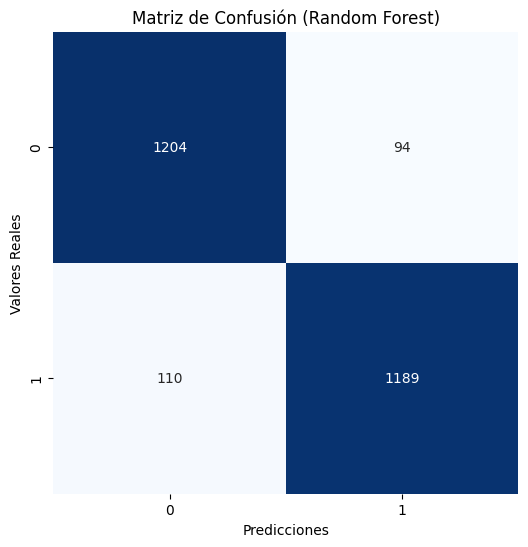

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Crear matriz de confusión
conf_matrix = confusion_matrix(y_prueba, rf_pred_default)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión (Random Forest)")
plt.show()

# Regresión

## 1. Carga y Revisión de integridad del dataset.

In [ ]:
# Cargamos el archivo csv
df2 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQyseeyovuHxvQV0euJngyTE_EYYxqQmbE_nnEqn483B96iwixM43_uCAFoozbB2GenfCve6atEeIsp/pub?gid=1457774632&single=true&output=csv")

In [ ]:
df2.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df2.shape

(10000, 6)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
# Resumen estadístico del dataframe
df2.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
# Cambiamos Extracurricular Activities a binario
df2['Extracurricular Activities'] = df2['Extracurricular Activities'].apply(lambda x: 1 if x == "Yes" else 0)

In [ ]:
df2["Extracurricular Activities"].unique()

array([1, 0])

In [ ]:
df2.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


## 2. Graficos de Scatter y de Correlación

In [ ]:
import plotly.express as px

# Gráfico de correlación
correlation_matrix = df2.corr()
fig_correlation = px.imshow(correlation_matrix, color_continuous_scale='RdBu', title='Matriz de Correlación')

# Mostrar los gráficos y sacar conclusiones
fig_correlation.show()

In [ ]:
fig = px.scatter_matrix(df2, width = 1350, height = 1350)
fig.show()

### Analisis de los graficos.
A partir de lo observado se hacen 3 observaciones

1. La variable predictiva con mayor correlacion en relacion a la variable objetivo es la de "Previous Scores" la cual brinda un coeficiente de correlación de pearson de 0.9151.

2. Por otro lado la variable que menos correlacion tiene es la de "Extracurricular activities" presnetando un coeficiente de correlación de pearon de 0.0245.

3. Finalmente se destaca el poco protagonismo de las horas de sueño en cuanto a su correlación con el performance index indicado en el dataset.



## 3. Estandarización de datos


In [ ]:
# Seleccionamos las columnas que vamos a estandarizar
df2_estandar = df2.columns[df2.columns != 'Extracurricular Activities']

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicamos la estandarización
df2[df2_estandar] = scaler.fit_transform(df2[df2_estandar])

# Vemos los cambios
df2.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1,1.456205,-1.249754,1.862167
1,-0.383481,0.723913,0,-1.492294,-0.900982,0.508818
2,1.161410,-1.063626,1,0.276805,-0.900982,-0.532220
3,0.002742,-1.005963,1,-0.902594,-0.900982,-1.000687
4,0.775188,0.320275,0,0.866505,0.145333,0.560870


## 4. Separación de datos


In [ ]:
# Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba (80% - 20%)
df2_train_test, df2_validacion, y_train_test, y_validacion = train_test_split(df2.drop(columns=['Performance Index']), df2['Performance Index'], test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en conjunto de entrenamiento y conjunto de prueba (75% - 25%)
df2_entrenamiento, df2_prueba, y_entrenamiento, y_prueba = train_test_split(df2_train_test, y_train_test, test_size=0.25, random_state=42)

## 5. Entrenamiento

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Inicializar los modelos con hiperparámetros predeterminados
rf_model_default = RandomForestRegressor(random_state=42)
dt_model_default = DecisionTreeRegressor(random_state=42)
lr_model_default = LinearRegression()

# Entrenar los modelos
rf_model_default.fit(df2_entrenamiento, y_entrenamiento)
dt_model_default.fit(df2_entrenamiento, y_entrenamiento)
lr_model_default.fit(df2_entrenamiento, y_entrenamiento)

# Evaluar los modelos con el conjunto de prueba
rf_pred_default = rf_model_default.predict(df2_prueba)
dt_pred_default = dt_model_default.predict(df2_prueba)
lr_pred_default = lr_model_default.predict(df2_prueba)

# Calcular métricas
# Evaluate the models with the mean squared error
rf_mse_default = mean_squared_error(y_prueba, rf_pred_default)
dt_mse_default = mean_squared_error(y_prueba, dt_pred_default)
lr_mse_default = mean_squared_error(y_prueba, lr_pred_default)

# Evaluate the models with the r2 score
rf_r2_default = r2_score(y_prueba, rf_pred_default)
dt_r2_default = r2_score(y_prueba, dt_pred_default)
lr_r2_default = r2_score(y_prueba, lr_pred_default)

print("Mean squared error for Random Forest:", rf_mse_default)
print("Mean squared error for Decision Tree:", dt_mse_default)
print("Mean squared error for Logistic Regression:", lr_mse_default)
print("\n")
print("R2 score for Random Forest:", rf_r2_default)
print("R2 score for Decision Tree:", dt_r2_default)
print("R2 score for Logistic Regression:", lr_r2_default)

Mean squared error for Random Forest: 0.014571053101674001
Mean squared error for Decision Tree: 0.024812568369024863
Mean squared error for Logistic Regression: 0.010955107148446162


R2 score for Random Forest: 0.9857629690163271
R2 score for Decision Tree: 0.9757562269391685
R2 score for Logistic Regression: 0.9892960241916924


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Evaluar los modelos con validación cruzada
rf_scores = cross_val_score(rf_model_default, df2_entrenamiento, y_entrenamiento, cv=5, scoring='neg_mean_squared_error')
dt_scores = cross_val_score(dt_model_default, df2_entrenamiento, y_entrenamiento, cv=5, scoring='neg_mean_squared_error')
lr_scores = cross_val_score(lr_model_default, df2_entrenamiento, y_entrenamiento, cv=5, scoring='neg_mean_squared_error')

# Calcular el promedio de los errores cuadráticos medios
rf_mse_cv = -rf_scores.mean()
dt_mse_cv = -dt_scores.mean()
lr_mse_cv = -lr_scores.mean()

# Calcular el coeficiente de determinación R2
rf_r2_cv = cross_val_score(rf_model_default, df2_entrenamiento, y_entrenamiento, cv=5, scoring='r2').mean()
dt_r2_cv = cross_val_score(dt_model_default, df2_entrenamiento, y_entrenamiento, cv=5, scoring='r2').mean()
lr_r2_cv = cross_val_score(lr_model_default, df2_entrenamiento, y_entrenamiento, cv=5, scoring='r2').mean()

print("Mean squared error (Random Forest) with cross-validation:", rf_mse_cv)
print("R2 score (Random Forest) with cross-validation:", rf_r2_cv)
print("\n")
print("Mean squared error (Decision Tree) with cross-validation:", dt_mse_cv)
print("R2 score (Decision Tree) with cross-validation:", dt_r2_cv)
print("\n")
print("Mean squared error (Linear Regression) with cross-validation:", lr_mse_cv)
print("R2 score (Linear Regression) with cross-validation:", lr_r2_cv)


Mean squared error (Random Forest) with cross-validation: 0.015395113104782487
R2 score (Random Forest) with cross-validation: 0.9844495360307197


Mean squared error (Decision Tree) with cross-validation: 0.026468450529280818
R2 score (Decision Tree) with cross-validation: 0.9732708437259383


Mean squared error (Linear Regression) with cross-validation: 0.011443691828643491
R2 score (Linear Regression) with cross-validation: 0.9884399126311333


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Inicializar los modelos con hiperparámetros predeterminados
rf_model_default = RandomForestRegressor(random_state=42)
dt_model_default = DecisionTreeRegressor(random_state=42)
lr_model_default = LinearRegression()

# Definir los espacios de búsqueda de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Realizar Grid Search para Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model_default, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(df2_entrenamiento, y_entrenamiento)
best_rf_model = grid_search_rf.best_estimator_

# Realizar Grid Search para Decision Tree
grid_search_dt = GridSearchCV(estimator=dt_model_default, param_grid=param_grid_dt, cv=5)
grid_search_dt.fit(df2_entrenamiento, y_entrenamiento)
best_dt_model = grid_search_dt.best_estimator_

# No es necesario Grid Search para Regresión Lineal (no tiene hiperparámetros)

# Imprimir los mejores hiperparámetros para Random Forest y Decision Tree
print("Mejores hiperparámetros para Random Forest:", best_rf_model.get_params())
print("Mejores hiperparámetros para Decision Tree:", best_dt_model.get_params())

Mejores hiperparámetros para Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Mejores hiperparámetros para Decision Tree: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [ ]:
# Evaluar los modelos con el conjunto de prueba
rf_pred_best = best_rf_model.predict(df2_prueba)
dt_pred_best = best_dt_model.predict(df2_prueba)

# Calcular métricas
# Evaluate the models with the mean squared error
rf_mse_best = mean_squared_error(y_prueba, rf_pred_best)
dt_mse_best = mean_squared_error(y_prueba, dt_pred_best)

# Evaluate the models with the r2 score
rf_r2_best = r2_score(y_prueba, rf_pred_best)
dt_r2_best = r2_score(y_prueba, dt_pred_best)

print("Mean squared error for Random Forest:", rf_mse_best)
print("Mean squared error for Decision Tree:", dt_mse_best)
print("Mean squared error for Logistic Regression:", lr_mse_default)
print("\n")
print("R2 score for Random Forest:", rf_r2_best)
print("R2 score for Decision Tree:", dt_r2_best)
print("R2 score for Logistic Regression:", lr_r2_default)

Mean squared error for Random Forest: 0.013078022474920218
Mean squared error for Decision Tree: 0.017338973216285167
Mean squared error for Logistic Regression: 0.010955107148446162


R2 score for Random Forest: 0.9872217738909195
R2 score for Decision Tree: 0.9830584998089832
R2 score for Logistic Regression: 0.9892960241916924


## 6. Elección mejor modelo

In [ ]:
print("Random Forest:")
print("  - Mean squared error (Best):", rf_mse_best)
print("  - R2 score (Best):", rf_r2_best)
print("  - Mean squared error (Default):", rf_mse_default)
print("  - R2 score (Default):", rf_r2_default)
print("\n")

print("Decision Tree:")
print("  - Mean squared error (Best):", dt_mse_best)
print("  - R2 score (Best):", dt_r2_best)
print("  - Mean squared error (Default):", dt_mse_default)
print("  - R2 score (Default):", dt_r2_default)
print("\n")

print("Linear Regression:")
print("  - Mean squared error (Default):", lr_mse_default)
print("  - R2 score (Default):", lr_r2_default)

Random Forest:
  - Mean squared error (Best): 0.013078022474920218
  - R2 score (Best): 0.9872217738909195
  - Mean squared error (Default): 0.014571053101674001
  - R2 score (Default): 0.9857629690163271


Decision Tree:
  - Mean squared error (Best): 0.017338973216285167
  - R2 score (Best): 0.9830584998089832
  - Mean squared error (Default): 0.024812568369024863
  - R2 score (Default): 0.9757562269391685


Linear Regression:
  - Mean squared error (Default): 0.010955107148446162
  - R2 score (Default): 0.9892960241916924


El mejor modelo es la regresión lineal

## 7. Predichos vs Realidad

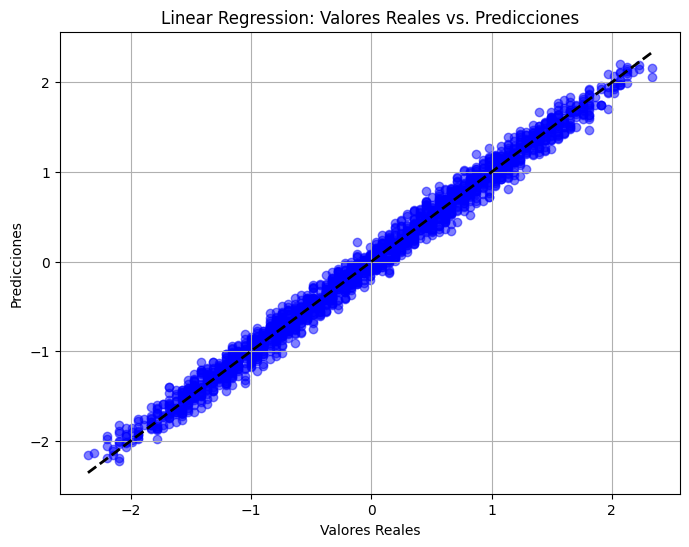

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión para Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_prueba, lr_pred_default, color='b', alpha=0.5)
plt.plot([min(y_prueba), max(y_prueba)], [min(y_prueba), max(y_prueba)], 'k--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Linear Regression: Valores Reales vs. Predicciones")
plt.grid(True)
plt.show()